In [4]:
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from tensorflow.keras import datasets
from sklearn.preprocessing import OneHotEncoder
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, Flatten, BatchNormalization 
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

In [5]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


In [6]:
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 1)


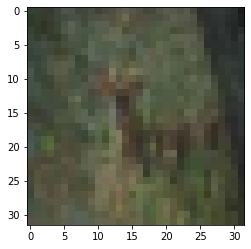

In [7]:
# pick a sample to plot
sample = 10
image = x_train[sample]

# plot the sample
fig = plt.figure
plt.imshow(image)
plt.show()

In [8]:
m = np.max(x_train)
x_train = x_train/m
x_test = x_test/m

In [9]:
hot = OneHotEncoder()
y_train = hot.fit_transform(y_train.reshape(-1, 1)).toarray()
y_test = hot.transform(y_test.reshape(-1, 1)).toarray()
from sklearn.model_selection import train_test_split

x_treino, x_val, y_treino, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 13, stratify=y_train)

x_treino.shape, x_val.shape, x_test.shape, y_treino.shape, y_val.shape, y_test.shape

((40000, 32, 32, 3),
 (10000, 32, 32, 3),
 (10000, 32, 32, 3),
 (40000, 10),
 (10000, 10),
 (10000, 10))

In [10]:
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, BatchNormalization

In [11]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [12]:
rede_simples = Sequential()

rede_simples.add(Conv2D(32, (5,5), input_shape=(32,32,3)))
rede_simples.add(BatchNormalization())
rede_simples.add(Activation('relu'))
rede_simples.add(MaxPooling2D())
#rede_simples.add(Dropout(0.3))

rede_simples.add(Conv2D(64, (5,5)))
rede_simples.add(BatchNormalization())
rede_simples.add(Activation('relu'))
rede_simples.add(MaxPooling2D())
#rede_simples.add(Dropout(0.3))

rede_simples.add(Conv2D(64, (5,5)))
rede_simples.add(BatchNormalization())
rede_simples.add(Activation('relu'))
#rede_simples.add(Dropout(0.3))



rede_simples.add(Flatten())
rede_simples.add(Dense(64))
rede_simples.add(BatchNormalization())
rede_simples.add(Activation('relu'))
#rede_simples.add(Dropout(0.3))

rede_simples.add(Dense(10))
rede_simples.add(Activation('softmax'))
                 
rede_simples.summary()

rede_simples.compile(loss = 'categorical_crossentropy', optimizer = 'sgd', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 64)        51264     
                                                                 
 batch_normalization_1 (Batc  (None, 10, 10, 64)       2

In [13]:
es = EarlyStopping(monitor = 'val_loss', min_delta = 0.001, patience = 15, verbose = 1, mode = 'auto')
    
historico = rede_simples.fit(x_treino, 
                             y_treino, 
                             epochs = 150, 
                             batch_size=64,
                             verbose = 1,
                             validation_data = (x_val, y_val),
                             callbacks = [es])

Epoch 1/150
625/625 [==============================] - 84s 132ms/step - loss: 1.6199 - accuracy: 0.4274 - val_loss: 1.6631 - val_accuracy: 0.3862
Epoch 2/150
625/625 [==============================] - 82s 132ms/step - loss: 1.2530 - accuracy: 0.5625 - val_loss: 1.3921 - val_accuracy: 0.5215
Epoch 3/150
625/625 [==============================] - 81s 130ms/step - loss: 1.0941 - accuracy: 0.6199 - val_loss: 2.1572 - val_accuracy: 0.3808
Epoch 4/150
625/625 [==============================] - 81s 130ms/step - loss: 0.9944 - accuracy: 0.6537 - val_loss: 1.6430 - val_accuracy: 0.4555
Epoch 5/150
625/625 [==============================] - 82s 132ms/step - loss: 0.9131 - accuracy: 0.6826 - val_loss: 1.0567 - val_accuracy: 0.6389
Epoch 6/150
625/625 [==============================] - 81s 130ms/step - loss: 0.8488 - accuracy: 0.7062 - val_loss: 1.7608 - val_accuracy: 0.4554
Epoch 7/150
625/625 [==============================] - 83s 132ms/step - loss: 0.7872 - accuracy: 0.7284 - val_loss: 1.2828 -

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

pred_simples = rede_simples.predict(x_test)

accuracy_score(y_test.argmax(1), pred_simples.argmax(1))

0.6387

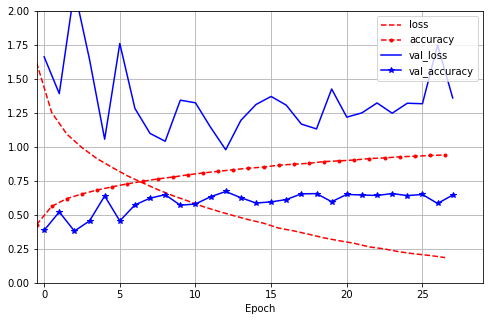

In [15]:
# extra code – shows how to shift the training curve by -1/2 epoch
plt.figure(figsize=(8, 5))
for key, style in zip(historico.history, ["r--", "r--.", "b-", "b-*"]):
    epochs = np.array(historico.epoch) + (0 if key.startswith("val_") else -0.5)
    plt.plot(epochs, historico.history[key], style, label=key)
plt.xlabel("Epoch")
plt.axis([-0.5, 29, 0., 2])
plt.legend(loc="upper right")
plt.grid()
plt.show()

In [16]:
rede_simples = Sequential()

rede_simples.add(Conv2D(32, (5,5), input_shape=(32,32,3)))
rede_simples.add(BatchNormalization())
rede_simples.add(Activation('relu'))
rede_simples.add(MaxPooling2D())
rede_simples.add(Dropout(0.3))

rede_simples.add(Conv2D(64, (5,5)))
rede_simples.add(BatchNormalization())
rede_simples.add(Activation('relu'))
rede_simples.add(MaxPooling2D())
rede_simples.add(Dropout(0.3))

rede_simples.add(Conv2D(64, (5,5)))
rede_simples.add(BatchNormalization())
rede_simples.add(Activation('relu'))
rede_simples.add(Dropout(0.3))



rede_simples.add(Flatten())
rede_simples.add(Dense(64))
rede_simples.add(BatchNormalization())
rede_simples.add(Activation('relu'))
rede_simples.add(Dropout(0.3))

rede_simples.add(Dense(10))
rede_simples.add(Activation('softmax'))
                 
rede_simples.summary()

rede_simples.compile(loss = 'categorical_crossentropy', optimizer = 'sgd', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        2432      
                                                                 
 batch_normalization_4 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_5 (Activation)   (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 10, 10, 64)       

In [17]:
es = EarlyStopping(monitor = 'val_loss', min_delta = 0.001, patience = 5, verbose = 1, mode = 'auto')
    
historico = rede_simples.fit(x_treino, 
                             y_treino, 
                             epochs = 150, 
                             batch_size=64,
                             verbose = 1,
                             validation_data = (x_val, y_val),
                             callbacks = [es])

Epoch 1/150
625/625 [==============================] - 87s 137ms/step - loss: 2.0492 - accuracy: 0.2650 - val_loss: 1.7955 - val_accuracy: 0.3373
Epoch 2/150
625/625 [==============================] - 85s 136ms/step - loss: 1.7310 - accuracy: 0.3641 - val_loss: 1.6184 - val_accuracy: 0.4176
Epoch 3/150
625/625 [==============================] - 85s 137ms/step - loss: 1.6090 - accuracy: 0.4080 - val_loss: 1.4087 - val_accuracy: 0.4946
Epoch 4/150
625/625 [==============================] - 86s 137ms/step - loss: 1.5348 - accuracy: 0.4399 - val_loss: 2.2451 - val_accuracy: 0.2613
Epoch 5/150
625/625 [==============================] - 85s 135ms/step - loss: 1.4762 - accuracy: 0.4595 - val_loss: 1.3491 - val_accuracy: 0.5232
Epoch 6/150
625/625 [==============================] - 86s 137ms/step - loss: 1.4267 - accuracy: 0.4830 - val_loss: 2.0178 - val_accuracy: 0.3543
Epoch 7/150
625/625 [==============================] - 85s 136ms/step - loss: 1.3841 - accuracy: 0.5011 - val_loss: 1.6780 -

In [18]:
rede_simples.evaluate(x_test, y_test)

313/313 [==============================] - 5s 17ms/step - loss: 0.9844 - accuracy: 0.6503


[0.9844053983688354, 0.6503000259399414]

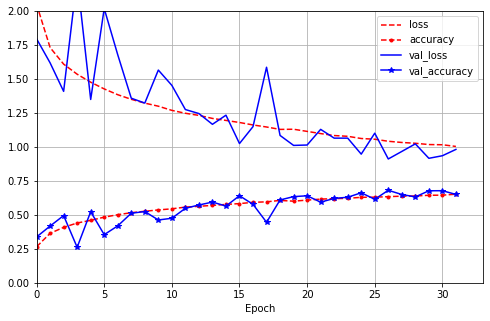

In [19]:
pd.DataFrame(historico.history).plot(
    figsize=(8, 5), xlim=[0, 33], ylim=[0, 2], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="upper right")  # extra code
plt.show()